# Rs

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import  train_test_split,GridSearchCV,cross_val_score
warnings.filterwarnings('ignore')

In [136]:
Train_Data=pd.read_excel('Flight_Data_Train.xlsx')
Test_Data=pd.read_excel('Flight_Test_set.xlsx')
Train_Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [137]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [138]:
Test_Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [139]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


Now we will use excel delimiter to split hour and minute of duration of flight and call the files to here.

In [140]:
Train_Data=pd.read_excel('Flight_Data_Train2.xlsx',parse_dates=['Date_of_Journey','Dep_Time','Arrival_Time'])
Test_Data=pd.read_excel('Flight_Test_set2.xlsx',parse_dates=['Date_of_Journey','Dep_Time','Arrival_Time'])
Train_Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Dur_hour,Dur_min,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-06-24 22:20:00,2020-03-22 01:10:00,2h,50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-06-24 05:50:00,2020-06-24 13:15:00,7h,25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-06-24 09:25:00,2020-06-10 04:25:00,19h,0m,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-06-24 18:05:00,2020-06-24 23:30:00,5h,25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-06-24 16:50:00,2020-06-24 21:35:00,4h,45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2020-06-24 19:55:00,2020-06-24 22:25:00,2h,30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2020-06-24 20:45:00,2020-06-24 23:20:00,2h,35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2020-06-24 08:20:00,2020-06-24 11:20:00,3h,0m,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2020-06-24 11:30:00,2020-06-24 14:10:00,2h,40m,non-stop,No info,12648


In [141]:
Test_Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Dur_hour,Dur_min,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2020-06-24 17:30:00,2020-06-07 04:25:00,10h,55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2020-06-24 06:20:00,2020-06-24 10:20:00,4h,0m,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2020-06-24 19:15:00,2020-05-22 19:00:00,23h,45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2020-06-24 08:00:00,2020-06-24 21:00:00,13h,0m,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2020-06-24 23:55:00,2020-06-25 02:45:00,2h,50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2020-06-24 20:30:00,2020-06-07 20:25:00,23h,55m,1 stop,No info
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2020-06-24 14:20:00,2020-06-24 16:55:00,2h,35m,non-stop,No info
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2020-06-24 21:50:00,2020-03-07 04:25:00,6h,35m,1 stop,No info
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2020-06-24 04:00:00,2020-06-24 19:15:00,15h,15m,1 stop,No info


# Exploratory data Analysis

In [142]:
print(Train_Data.shape)
print(Test_Data.shape)

(10683, 12)
(2671, 11)


In [143]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null datetime64[ns]
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null datetime64[ns]
Arrival_Time       10683 non-null datetime64[ns]
Dur_hour           10683 non-null object
Dur_min            10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: datetime64[ns](3), int64(1), object(8)
memory usage: 1001.7+ KB


In [144]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null datetime64[ns]
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null datetime64[ns]
Arrival_Time       2671 non-null datetime64[ns]
Dur_hour           2671 non-null object
Dur_min            2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: datetime64[ns](3), object(8)
memory usage: 229.7+ KB


Checking Null values and Handelling them

In [145]:
Train_Data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Dur_hour           0
Dur_min            0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [146]:
#As the number of nan value is very very less so we drop the observations with null value
Train_Data.dropna(inplace=True)
Train_Data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Dur_hour           0
Dur_min            0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [147]:
#Shape After Dropping the Na value
Train_Data.shape

(10682, 12)

In [148]:
Test_Data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Dur_hour           0
Dur_min            0
Total_Stops        0
Additional_Info    0
dtype: int64

In [149]:
#There is no null Value in the Test_Data

In [150]:
#Date_of_Journey
#Train_Data
Train_Data['Day_of_Journey']=Train_Data['Date_of_Journey'].dt.day
Train_Data['Month_of_Journey']=Train_Data['Date_of_Journey'].dt.month

# As it is a data of 2019 so we don't take year column

#Test_Data

Test_Data['Day_of_Journey']=Test_Data['Date_of_Journey'].dt.day
Test_Data['Month_of_Journey']=Test_Data['Date_of_Journey'].dt.month
Train_Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Dur_hour,Dur_min,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-06-24 22:20:00,2020-03-22 01:10:00,2h,50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-06-24 05:50:00,2020-06-24 13:15:00,7h,25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-06-24 09:25:00,2020-06-10 04:25:00,19h,0m,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-06-24 18:05:00,2020-06-24 23:30:00,5h,25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-06-24 16:50:00,2020-06-24 21:35:00,4h,45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2020-06-24 19:55:00,2020-06-24 22:25:00,2h,30m,non-stop,No info,4107,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2020-06-24 20:45:00,2020-06-24 23:20:00,2h,35m,non-stop,No info,4145,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2020-06-24 08:20:00,2020-06-24 11:20:00,3h,0m,non-stop,No info,7229,27,4
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2020-06-24 11:30:00,2020-06-24 14:10:00,2h,40m,non-stop,No info,12648,3,1


In [151]:
#Dep_Time
#Train_Data
Train_Data['Dep_hour']=Train_Data['Dep_Time'].dt.hour
Train_Data['Dep_min']=Train_Data['Dep_Time'].dt.minute

#Test_Data
Test_Data['Dep_hour']=Test_Data['Dep_Time'].dt.hour
Test_Data['Dep_min']=Test_Data['Dep_Time'].dt.minute
Train_Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Dur_hour,Dur_min,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-06-24 22:20:00,2020-03-22 01:10:00,2h,50m,non-stop,No info,3897,24,3,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-06-24 05:50:00,2020-06-24 13:15:00,7h,25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-06-24 09:25:00,2020-06-10 04:25:00,19h,0m,2 stops,No info,13882,6,9,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-06-24 18:05:00,2020-06-24 23:30:00,5h,25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-06-24 16:50:00,2020-06-24 21:35:00,4h,45m,1 stop,No info,13302,3,1,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2020-06-24 19:55:00,2020-06-24 22:25:00,2h,30m,non-stop,No info,4107,4,9,19,55
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2020-06-24 20:45:00,2020-06-24 23:20:00,2h,35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2020-06-24 08:20:00,2020-06-24 11:20:00,3h,0m,non-stop,No info,7229,27,4,8,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2020-06-24 11:30:00,2020-06-24 14:10:00,2h,40m,non-stop,No info,12648,3,1,11,30


In [152]:
#Arrival_Time
#Train_Data
Train_Data['Arrival_hour']=Train_Data['Arrival_Time'].dt.hour
Train_Data['Arrival_min']=Train_Data['Arrival_Time'].dt.minute

#Test_Data
Test_Data['Arrival_hour']=Test_Data['Arrival_Time'].dt.hour
Test_Data['Arrival_min']=Test_Data['Arrival_Time'].dt.minute
Train_Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Dur_hour,Dur_min,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-06-24 22:20:00,2020-03-22 01:10:00,2h,50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-06-24 05:50:00,2020-06-24 13:15:00,7h,25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-06-24 09:25:00,2020-06-10 04:25:00,19h,0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-06-24 18:05:00,2020-06-24 23:30:00,5h,25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-06-24 16:50:00,2020-06-24 21:35:00,4h,45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2020-06-24 19:55:00,2020-06-24 22:25:00,2h,30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2020-06-24 20:45:00,2020-06-24 23:20:00,2h,35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2020-06-24 08:20:00,2020-06-24 11:20:00,3h,0m,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2020-06-24 11:30:00,2020-06-24 14:10:00,2h,40m,non-stop,No info,12648,3,1,11,30,14,10


In [153]:
#Duration_Hour & Duration_Minute
#Train_Data
Train_Data['Dur_hour']=Train_Data['Dur_hour'].str.replace('h','')
Train_Data['Dur_min']=Train_Data['Dur_min'].str.replace('m','')

#Changing the data type from object to int
Train_Data['Dur_hour']=Train_Data['Dur_hour'].astype(int)
Train_Data['Dur_min']=Train_Data['Dur_min'].astype(int)

#Test_Data
Test_Data['Dur_hour']=Test_Data['Dur_hour'].str.replace('h','')
Test_Data['Dur_min']=Test_Data['Dur_min'].str.replace('m','')

#Changing the data type from object to int
Test_Data['Dur_hour']=Test_Data['Dur_hour'].astype(int)
Test_Data['Dur_min']=Test_Data['Dur_min'].astype(int)

Train_Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Dur_hour,Dur_min,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2020-06-24 22:20:00,2020-03-22 01:10:00,2,50,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2020-06-24 05:50:00,2020-06-24 13:15:00,7,25,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2020-06-24 09:25:00,2020-06-10 04:25:00,19,0,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2020-06-24 18:05:00,2020-06-24 23:30:00,5,25,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2020-06-24 16:50:00,2020-06-24 21:35:00,4,45,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2020-06-24 19:55:00,2020-06-24 22:25:00,2,30,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2020-06-24 20:45:00,2020-06-24 23:20:00,2,35,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2020-06-24 08:20:00,2020-06-24 11:20:00,3,0,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2020-06-24 11:30:00,2020-06-24 14:10:00,2,40,non-stop,No info,12648,3,1,11,30,14,10


In [154]:
Test_Data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Dur_hour,Dur_min,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2020-06-24 17:30:00,2020-06-07 04:25:00,10,55,1 stop,No info,6,6,17,30,4,25
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2020-06-24 06:20:00,2020-06-24 10:20:00,4,0,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2020-06-24 19:15:00,2020-05-22 19:00:00,23,45,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2020-06-24 08:00:00,2020-06-24 21:00:00,13,0,1 stop,No info,21,5,8,0,21,0
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2020-06-24 23:55:00,2020-06-25 02:45:00,2,50,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2020-06-24 20:30:00,2020-06-07 20:25:00,23,55,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2020-06-24 14:20:00,2020-06-24 16:55:00,2,35,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2020-06-24 21:50:00,2020-03-07 04:25:00,6,35,1 stop,No info,3,6,21,50,4,25
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2020-06-24 04:00:00,2020-06-24 19:15:00,15,15,1 stop,No info,3,6,4,0,19,15


In [155]:
#Dropping the Redundant Columns from both Data_sets
list=['Date_of_Journey','Dep_Time','Arrival_Time']

#Train_Data
Train_Data=Train_Data.drop(list,axis=1)

#Test_Data
Test_Data=Test_Data.drop(list,axis=1)

In [156]:
Train_Data

,Airline,Source,Destination,Route,Dur_hour,Dur_min,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2,50,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7,25,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19,0,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5,25,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4,45,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2,30,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2,35,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3,0,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2,40,non-stop,No info,12648,3,1,11,30,14,10


In [157]:
Data=Train_Data
Data

,Airline,Source,Destination,Route,Dur_hour,Dur_min,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2,50,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7,25,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19,0,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5,25,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4,45,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2,30,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2,35,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3,0,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2,40,non-stop,No info,12648,3,1,11,30,14,10


In [158]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
Airline             10682 non-null object
Source              10682 non-null object
Destination         10682 non-null object
Route               10682 non-null object
Dur_hour            10682 non-null int32
Dur_min             10682 non-null int32
Total_Stops         10682 non-null object
Additional_Info     10682 non-null object
Price               10682 non-null int64
Day_of_Journey      10682 non-null int64
Month_of_Journey    10682 non-null int64
Dep_hour            10682 non-null int64
Dep_min             10682 non-null int64
Arrival_hour        10682 non-null int64
Arrival_min         10682 non-null int64
dtypes: int32(2), int64(7), object(6)
memory usage: 1.2+ MB


Uni And Bivariate Analysis

In [159]:
Data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

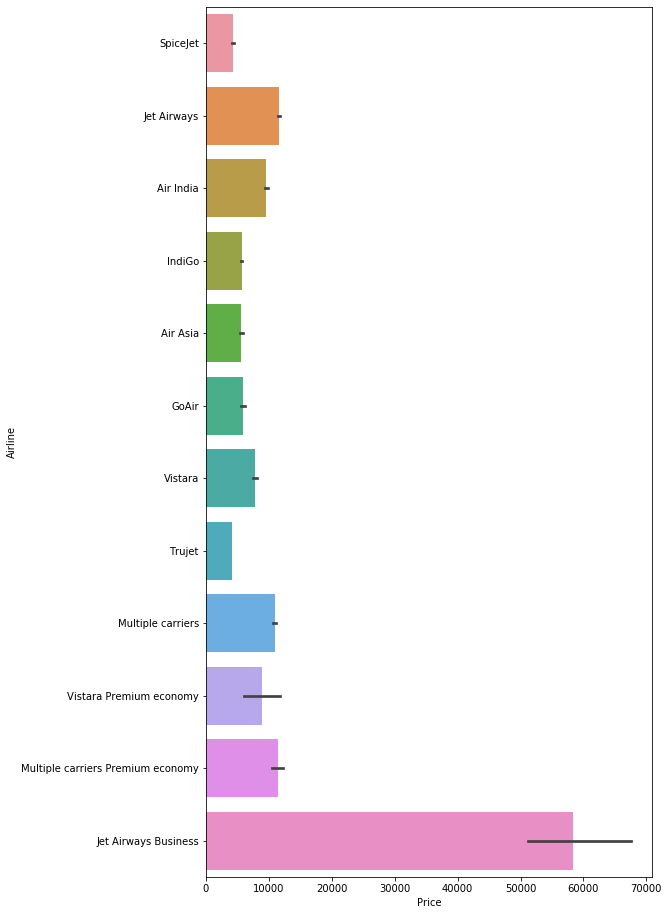

In [160]:
da=Data.sort_values(by='Price',ascending=True)
plt.figure(figsize=(8,16))
sns.barplot(y='Airline',x='Price',data=da)

Among all the airlines Jet Airways has highest number of planse i.e. 3849 but the Price of Jet Airways Business is heighest.

In [161]:
Data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

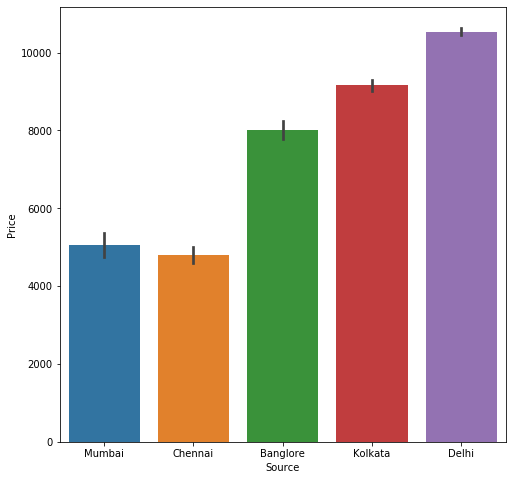

In [162]:
plt.figure(figsize=(8,8))
sns.barplot(x='Source',y='Price',data=da)

The price of Flight from Delhi is very  high as compared to other Sourses and Chennai is lowest.

In [163]:
Data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

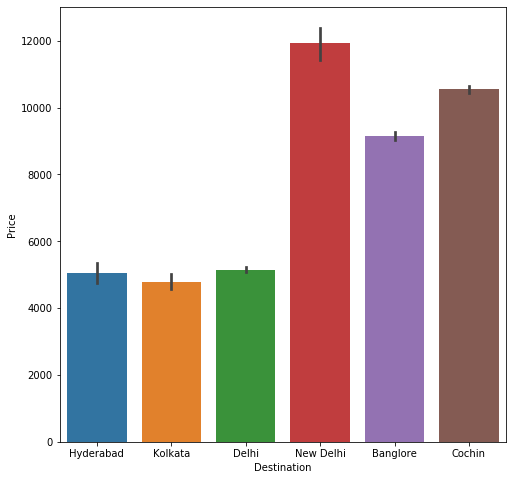

In [164]:
plt.figure(figsize=(8,8))
sns.barplot(x='Destination',y='Price',data=da)

Also if the Destination is New Delhi then the Price is Heighest followed by Cochin and Bangalore and lowest is Kolkata.

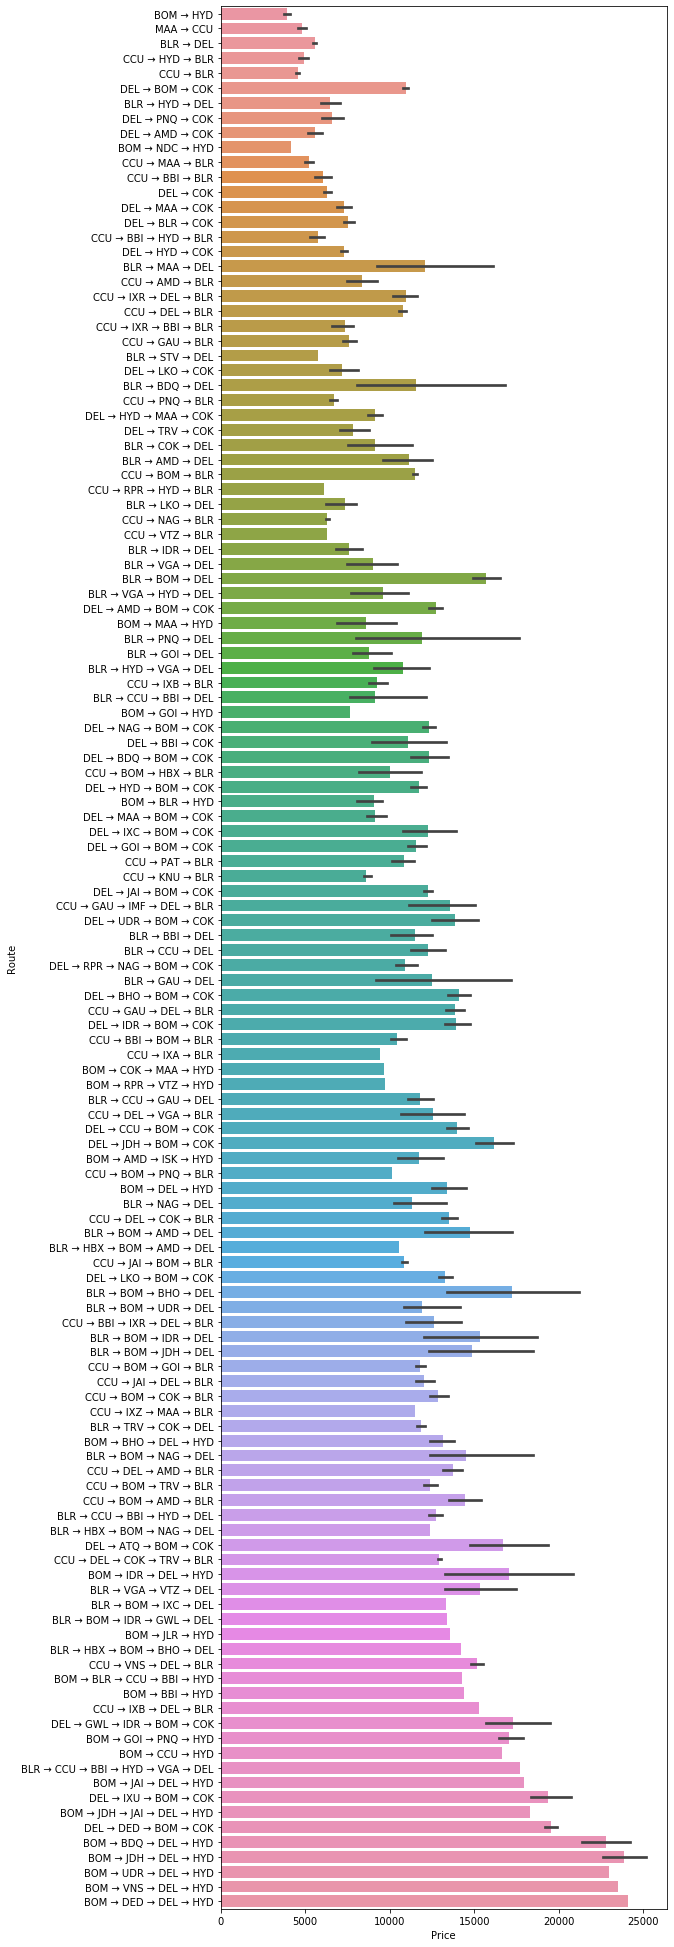

In [165]:
plt.figure(figsize=(8,35))
sns.barplot(y='Route',x='Price',data=da)

When the Route is BOM->HYD the price of ticket is lowest and route is BOM->DED->DEL->HYD the price of ticket is heighest.

In [166]:
Data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

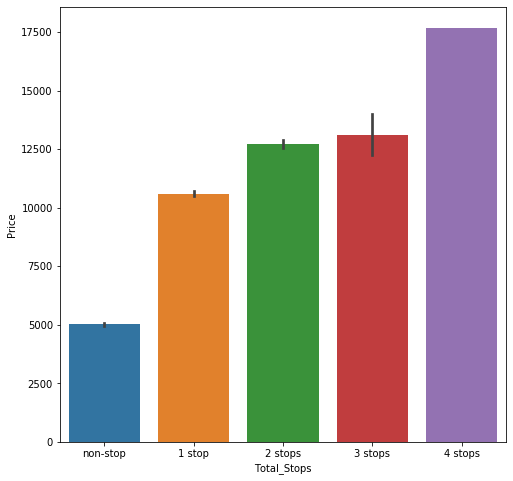

In [167]:
plt.figure(figsize=(8,8))
sns.barplot(x='Total_Stops',y='Price',data=da)

With Increase in stopage the price of ticket increases.

In [168]:
#Encodding the categorical values
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
Data['airline']=Le.fit_transform(Data['Airline'])
Data['source']=Le.fit_transform(Data['Source'])
Data['destination']=Le.fit_transform(Data['Destination'])
Data['route']=Le.fit_transform(Data['Route'])
Data['total_Stops']=Le.fit_transform(Data['Total_Stops'])
Data['additional_Info']=Le.fit_transform(Data['Additional_Info'])
Data

,Airline,Source,Destination,Route,Dur_hour,Dur_min,Total_Stops,Additional_Info,Price,Day_of_Journey,...,Dep_hour,Dep_min,Arrival_hour,Arrival_min,airline,source,destination,route,total_Stops,additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,2,50,non-stop,No info,3897,24,...,22,20,1,10,3,0,5,18,4,8
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7,25,2 stops,No info,7662,5,...,5,50,13,15,1,3,0,84,1,8
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19,0,2 stops,No info,13882,6,...,9,25,4,25,4,2,1,118,1,8
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5,25,1 stop,No info,6218,5,...,18,5,23,30,3,3,0,91,0,8
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4,45,1 stop,No info,13302,3,...,16,50,21,35,3,0,5,29,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2,30,non-stop,No info,4107,4,...,19,55,22,25,0,3,0,64,4,8
10679,Air India,Kolkata,Banglore,CCU → BLR,2,35,non-stop,No info,4145,27,...,20,45,23,20,1,3,0,64,4,8
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3,0,non-stop,No info,7229,27,...,8,20,11,20,4,0,2,18,4,8
10681,Vistara,Banglore,New Delhi,BLR → DEL,2,40,non-stop,No info,12648,3,...,11,30,14,10,10,0,5,18,4,8


In [169]:
#For future Use what is encoded for what
Airline=Data.loc[:,['Airline','airline']].drop_duplicates()
print(Airline)
print('\n')
Source=Data.loc[:,['Source','source']].drop_duplicates()
print(Source)
print('\n')
Destination=Data.loc[:,['Destination','destination']].drop_duplicates()
print(Destination)
print('\n')
Route=Data.loc[:,['Route','route']].drop_duplicates()
print(Route)
print('\n')
Total_Stops=Data.loc[:,['Total_Stops','total_Stops']].drop_duplicates()
print(Total_Stops)
print('\n')
Additional_Info=Data.loc[:,['Additional_Info','additional_Info']].drop_duplicates()
print(Additional_Info)

                                Airline  airline
0                                IndiGo        3
1                             Air India        1
2                           Jet Airways        4
5                              SpiceJet        8
9                     Multiple carriers        6
20                                GoAir        2
28                              Vistara       10
43                             Air Asia        0
426             Vistara Premium economy       11
657                Jet Airways Business        5
717   Multiple carriers Premium economy        7
2878                             Trujet        9


      Source  source
0   Banglore       0
1    Kolkata       3
2      Delhi       2
12   Chennai       1
59    Mumbai       4


   Destination  destination
0    New Delhi            5
1     Banglore            0
2       Cochin            1
12     Kolkata            4
22       Delhi            2
59   Hyderabad            3


                                  R

In [170]:
#Drop the redundant columns
list1=['Airline','Source','Destination','Route','Total_Stops','Additional_Info']
Data=Data.drop(list1,axis=1)
Data

,Dur_hour,Dur_min,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,airline,source,destination,route,total_Stops,additional_Info
0,2,50,3897,24,3,22,20,1,10,3,0,5,18,4,8
1,7,25,7662,5,1,5,50,13,15,1,3,0,84,1,8
2,19,0,13882,6,9,9,25,4,25,4,2,1,118,1,8
3,5,25,6218,5,12,18,5,23,30,3,3,0,91,0,8
4,4,45,13302,3,1,16,50,21,35,3,0,5,29,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,30,4107,4,9,19,55,22,25,0,3,0,64,4,8
10679,2,35,4145,27,4,20,45,23,20,1,3,0,64,4,8
10680,3,0,7229,27,4,8,20,11,20,4,0,2,18,4,8
10681,2,40,12648,3,1,11,30,14,10,10,0,5,18,4,8


In [171]:
# Encoding Test_Data
list1=['Airline','Source','Destination','Route','Total_Stops','Additional_Info']
for i in list1:
    Test_Data[i]=Le.fit_transform(Test_Data[i])

In [172]:
Test_Data

,Airline,Source,Destination,Route,Dur_hour,Dur_min,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,2,1,76,10,55,0,5,6,6,17,30,4,25
1,3,3,0,65,4,0,0,5,5,12,6,20,10,20
2,4,2,1,76,23,45,0,3,21,5,19,15,19,0
3,6,2,1,76,13,0,0,5,21,5,8,0,21,0
4,0,0,2,16,2,50,4,5,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,23,55,0,5,6,6,20,30,20,25
2667,3,3,0,43,2,35,4,5,27,3,14,20,16,55
2668,4,2,1,76,6,35,0,5,3,6,21,50,4,25
2669,1,2,1,76,15,15,0,5,3,6,4,0,19,15


In [173]:
Data

,Dur_hour,Dur_min,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,airline,source,destination,route,total_Stops,additional_Info
0,2,50,3897,24,3,22,20,1,10,3,0,5,18,4,8
1,7,25,7662,5,1,5,50,13,15,1,3,0,84,1,8
2,19,0,13882,6,9,9,25,4,25,4,2,1,118,1,8
3,5,25,6218,5,12,18,5,23,30,3,3,0,91,0,8
4,4,45,13302,3,1,16,50,21,35,3,0,5,29,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,30,4107,4,9,19,55,22,25,0,3,0,64,4,8
10679,2,35,4145,27,4,20,45,23,20,1,3,0,64,4,8
10680,3,0,7229,27,4,8,20,11,20,4,0,2,18,4,8
10681,2,40,12648,3,1,11,30,14,10,10,0,5,18,4,8


Lets split our Data to train test sets

In [177]:
df_x=Data.drop('Price',axis=1)
df_x

,Dur_hour,Dur_min,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,airline,source,destination,route,total_Stops,additional_Info
0,2,50,24,3,22,20,1,10,3,0,5,18,4,8
1,7,25,5,1,5,50,13,15,1,3,0,84,1,8
2,19,0,6,9,9,25,4,25,4,2,1,118,1,8
3,5,25,5,12,18,5,23,30,3,3,0,91,0,8
4,4,45,3,1,16,50,21,35,3,0,5,29,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,30,4,9,19,55,22,25,0,3,0,64,4,8
10679,2,35,27,4,20,45,23,20,1,3,0,64,4,8
10680,3,0,27,4,8,20,11,20,4,0,2,18,4,8
10681,2,40,3,1,11,30,14,10,10,0,5,18,4,8


In [178]:
y=Data.loc[:,'Price'].values.reshape(-1,1)
y

array([[ 3897],
       [ 7662],
       [13882],
       ...,
       [ 7229],
       [12648],
       [11753]], dtype=int64)

In [179]:
#Scalling the training Dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Dur_hour,Dur_min,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,airline,source,destination,route,total_Stops,additional_Info
0,-0.970614,1.279041,1.285536,-0.848450,1.654154,-0.234950,-1.800436,-0.890014,-0.410805,-1.658359,2.416534,-1.547082,1.407210,0.499921
1,-0.381999,-0.196319,-0.872724,-1.517909,-1.303113,1.363607,-0.050909,-0.587094,-1.261152,0.890014,-0.973812,0.249946,-0.253703,0.499921
2,1.030677,-1.671678,-0.759131,1.159928,-0.607286,0.031476,-1.363054,0.018745,0.014369,0.040556,-0.295743,1.175687,-0.253703,0.499921
3,-0.617445,-0.196319,-0.872724,2.164117,0.958326,-1.034229,1.407030,0.321664,-0.410805,0.890014,-0.973812,0.440539,-0.807341,0.499921
4,-0.735168,0.983969,-1.099909,-1.517909,0.610412,1.363607,1.115442,0.624584,-0.410805,-1.658359,2.416534,-1.247577,-0.807341,0.499921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-0.970614,0.098753,-0.986316,1.159928,1.132283,1.630034,1.261236,0.018745,-1.686326,0.890014,-0.973812,-0.294608,1.407210,0.499921
10678,-0.970614,0.393825,1.626314,-0.513720,1.306240,1.097181,1.407030,-0.284175,-1.261152,0.890014,-0.973812,-0.294608,1.407210,0.499921
10679,-0.852891,-1.671678,1.626314,-0.513720,-0.781243,-0.234950,-0.342497,-0.284175,0.014369,-1.658359,0.382326,-1.547082,1.407210,0.499921
10680,-0.970614,0.688897,-1.099909,-1.517909,-0.259372,0.297903,0.094885,-0.890014,2.565411,-1.658359,2.416534,-1.547082,1.407210,0.499921


Now our Data sets are ready for machine learning for predicting the Flight Ticket Price.

# Machine Learning

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
Max_r2_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.25)
    Lr=LinearRegression()
    Lr.fit(train_x,train_y)
    pred=Lr.predict(test_x)
    r2_scr=r2_score(test_y,pred)
    if r2_scr>Max_r2_score:
        Max_r2_score=r2_scr
        Final_r_state=r_state
    print('Max r2 Score corresponding to ',Final_r_state,' is ',Max_r2_score)    

Max r2 Score corresponding to  42  is  0.44234109843670266
Max r2 Score corresponding to  42  is  0.44234109843670266
Max r2 Score corresponding to  42  is  0.44234109843670266
Max r2 Score corresponding to  42  is  0.44234109843670266
Max r2 Score corresponding to  42  is  0.44234109843670266
Max r2 Score corresponding to  42  is  0.44234109843670266
Max r2 Score corresponding to  42  is  0.44234109843670266
Max r2 Score corresponding to  42  is  0.44234109843670266
Max r2 Score corresponding to  42  is  0.44234109843670266
Max r2 Score corresponding to  51  is  0.45547203462581287
Max r2 Score corresponding to  51  is  0.45547203462581287
Max r2 Score corresponding to  51  is  0.45547203462581287
Max r2 Score corresponding to  51  is  0.45547203462581287
Max r2 Score corresponding to  51  is  0.45547203462581287
Max r2 Score corresponding to  51  is  0.45547203462581287
Max r2 Score corresponding to  51  is  0.45547203462581287
Max r2 Score corresponding to  51  is  0.455472034625812

In [187]:
#Checking if the upper model is Under or Overfitting
a_score=cross_val_score(Lr,x,y,cv=5,scoring='r2')
print(a_score)
print(np.mean(a_score))

[0.4230875  0.41871621 0.42972365 0.41543739 0.39681478]
0.4167559047396964


In [189]:
#Final Linear Regression
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=98,test_size=0.25)
Lr=LinearRegression()
Lr.fit(train_x,train_y)
Lrpred=Lr.predict(test_x)
print(Lrpred)

[[ 3064.97455982]
 [14553.33956395]
 [ 7880.27936383]
 ...
 [11369.17367121]
 [10506.005768  ]
 [ 9657.20006903]]


# Checking the results through Other Algorithms

In [192]:
from sklearn.svm import SVR
sv=SVR()
param={'kernel':['rbf','linear','poly']}
Gd_sr=GridSearchCV(estimator=sv,param_grid=param,scoring='r2',cv=5)
Gd_sr.fit(train_x,train_y)
best_param=Gd_sr.best_params_
print(best_param)
best_score=Gd_sr.best_score_
print(best_score)

{'kernel': 'linear'}
0.32138120375777224


In [194]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
param={'criterion':['mse','mae','friedman_mse']}
Gd_sr=GridSearchCV(estimator=dt,param_grid=param,scoring='r2',cv=5)
Gd_sr.fit(train_x,train_y)
best_param=Gd_sr.best_params_
print(best_param)
best_score=Gd_sr.best_score_
print(best_score)

{'criterion': 'mae'}
0.7613558118207182


In [196]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
param={'n_neighbors':[50,100,150,200,250,300,350,400]}
Gd_sr=GridSearchCV(estimator=knn,param_grid=param,scoring='r2',cv=5)
Gd_sr.fit(train_x,train_y)
best_param=Gd_sr.best_params_
print(best_param)
best_score=Gd_sr.best_score_
print(best_score)

{'n_neighbors': 50}
0.5440199825794086


# Checking the results through Ensemble methods

In [199]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
param={'n_estimators':[50,100,150,200,250,300,350,400]}
Gd_sr=GridSearchCV(estimator=rf,param_grid=param,scoring='r2',cv=5)
Gd_sr.fit(train_x,train_y)
best_param=Gd_sr.best_params_
print(best_param)
best_score=Gd_sr.best_score_
print(best_score)

{'n_estimators': 200}
0.8641279756654445


In [200]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
param={'n_estimators':[50,100,150,200,150,200,250,300,350,400]}
Gd_sr=GridSearchCV(estimator=gb,param_grid=param,scoring='r2',cv=5)
Gd_sr.fit(train_x,train_y)
best_param=Gd_sr.best_params_
print(best_param)
best_score=Gd_sr.best_score_
print(best_score)

{'n_estimators': 400}
0.8644464232537805


GradientBoostingRegressor has the heighest r2_score i.e.0.8644464232537805(86.44%) so we save the model for production and future use.

In [201]:
gbr=GradientBoostingRegressor(n_estimators=400)
gbr.fit(train_x,train_y)
gbrpred=gbr.predict(test_x)
print('Predicted Price ',gbrpred)
print('R2 Score',r2_score(test_y,gbrpred))
print('Mean Absolute Error',mean_absolute_error(test_y,gbrpred))
print('Mean Squared Error',mean_squared_error(test_y,gbrpred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(test_y,gbrpred)))

Predicted Price  [ 4031.57872718 14230.90121688  7008.05794311 ... 10106.38456808
  8425.75869404  9533.3479363 ]
R2 Score 0.8899522791149168
Mean Absolute Error 965.535731240354
Mean Squared Error 1993210.202073543
Root Mean Squared Error 1411.8109654176592


Testing Data

In [202]:
Test_Data

,Airline,Source,Destination,Route,Dur_hour,Dur_min,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,4,2,1,76,10,55,0,5,6,6,17,30,4,25
1,3,3,0,65,4,0,0,5,5,12,6,20,10,20
2,4,2,1,76,23,45,0,3,21,5,19,15,19,0
3,6,2,1,76,13,0,0,5,21,5,8,0,21,0
4,0,0,2,16,2,50,4,5,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,23,55,0,5,6,6,20,30,20,25
2667,3,3,0,43,2,35,4,5,27,3,14,20,16,55
2668,4,2,1,76,6,35,0,5,3,6,21,50,4,25
2669,1,2,1,76,15,15,0,5,3,6,4,0,19,15


In [206]:
#Reindexing the columns of Test_Data as per training Dataset
Test_Data=Test_Data[['Dur_hour','Dur_min','Day_of_Journey','Month_of_Journey','Dep_hour','Dep_min','Arrival_hour','Arrival_min','Airline','Source','Destination','Route','Total_Stops','Additional_Info']]
Test_Data

,Dur_hour,Dur_min,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,10,55,6,6,17,30,4,25,4,2,1,76,0,5
1,4,0,5,12,6,20,10,20,3,3,0,65,0,5
2,23,45,21,5,19,15,19,0,4,2,1,76,0,3
3,13,0,21,5,8,0,21,0,6,2,1,76,0,5
4,2,50,24,6,23,55,2,45,0,0,2,16,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,23,55,6,6,20,30,20,25,1,3,0,51,0,5
2667,2,35,27,3,14,20,16,55,3,3,0,43,4,5
2668,6,35,3,6,21,50,4,25,4,2,1,76,0,5
2669,15,15,3,6,4,0,19,15,1,2,1,76,0,5


In [207]:
#Predicting The Test_Data and Save the Prediction
Test_pred=gbr.predict(Test_Data)
Test_pred

array([15964.18498675, 13577.64566606, 15142.89260658, ...,
       15964.18498675, 14387.55962334, 15964.18498675])

In [208]:
df=pd.DataFrame(Test_pred)
df.to_csv('Predicted_price_of_Flight_Ticket.csv')

In [210]:
#Saving the Model for Production
from sklearn.externals import joblib
joblib.dump(gbr,'Predict_price_of_flight_ticket.obj')

['Predict_price_of_flight_ticket.obj']